EDA Analaysis on S. Leone

Importing Libraries and Packages 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
from windrose import WindroseAxes

Dataset uploading and statistics for missing values

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from windrose import WindroseAxes  # pip install windrose

# Set plot style
sns.set(style='whitegrid')

# Load data
file_path = 'C:/Users/mukit/Desktop/week 0/solar-challenge-week/data/sierraleone-bumbuna.csv'
df = pd.read_csv(file_path, parse_dates=['Timestamp'])

print("Original data shape:", df.shape)


Original data shape: (525600, 19)


 STEP 1: Summary Statistics & Missing-Value Report

In [3]:
# Summary statistics for numeric columns
print("===== Summary Statistics =====")
print(df.describe(include=[np.number]))

# Missing value report
missing = df.isna().sum()
print("\n===== Missing Value Report =====")
print(missing[missing > 0])

# Columns with more than 5% missing
threshold = 0.05 * len(df)
print("\n===== Columns with >5% Missing =====")
print(missing[missing > threshold])


===== Summary Statistics =====
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691      26.319394      79.448857       1.146113   
std       288.889073       4.398605      20.520775       1.239248   
min         0.000000      12.300000       9.900000       0.000000   
25

STEP 2: Outlier Detection & Basic Cleaning

In [6]:
df_clean = df.copy()

# Impute missing values in key numeric columns
key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
for col in key_cols:
    if df_clean[col].isna().sum() > 0:
        df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# Compute Z-scores and flag outliers
for col in key_cols:
    df_clean[f'{col}_Z'] = np.abs(stats.zscore(df_clean[col], nan_policy='omit'))
    df_clean[f'{col}_Outlier'] = df_clean[f'{col}_Z'] > 3

# Export cleaned data (assuming folder `data/` exists and is in .gitignore)
df_clean.to_csv('C:/Users/mukit/Desktop/week 0/solar-challenge-week/data/leone_clean.csv', index=False)
print("\nCleaned data exported to data/leone_clean.csv")



Cleaned data exported to data/leone_clean.csv


STEP 3: Time Series Analysis

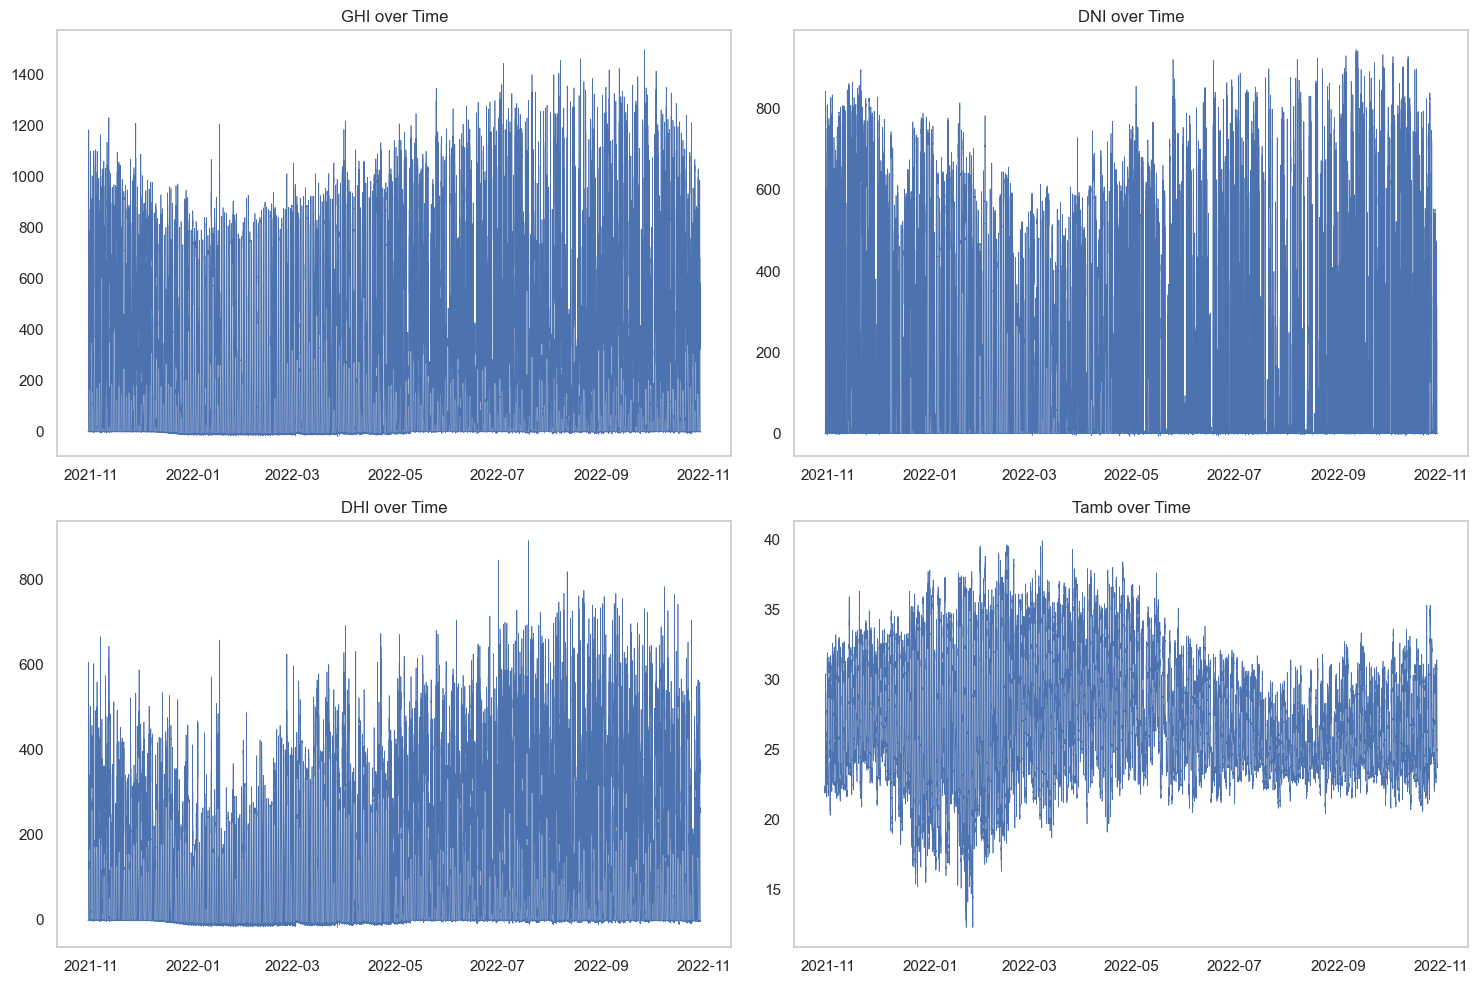

In [7]:
plt.figure(figsize=(15, 10))
ts_cols = ['GHI', 'DNI', 'DHI', 'Tamb']

for i, col in enumerate(ts_cols, 1):
    plt.subplot(2, 2, i)
    plt.plot(df_clean['Timestamp'], df_clean[col], linewidth=0.5)
    plt.title(f'{col} over Time')
    plt.grid()

plt.tight_layout()
plt.show()


STEP 4: Cleaning Impact on ModA & ModB

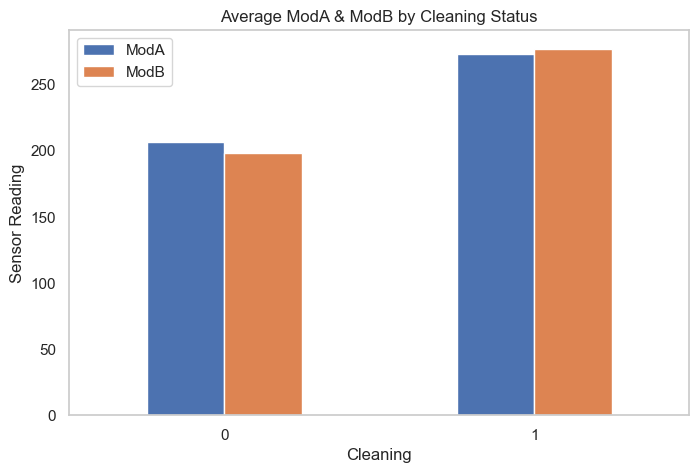

In [8]:
if 'Cleaning' in df_clean.columns:
    df_grouped = df_clean.groupby('Cleaning')[['ModA', 'ModB']].mean().reset_index()
    df_grouped.plot(x='Cleaning', kind='bar', figsize=(8, 5))
    plt.title('Average ModA & ModB by Cleaning Status')
    plt.ylabel('Sensor Reading')
    plt.xticks(rotation=0)
    plt.grid()
    plt.show()


STEP 5: Correlation & Relationship Analysis

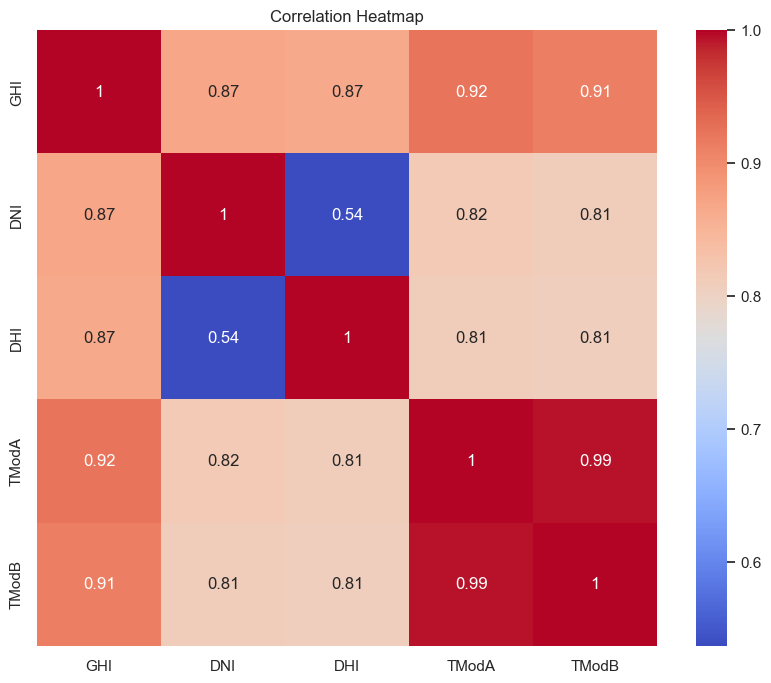

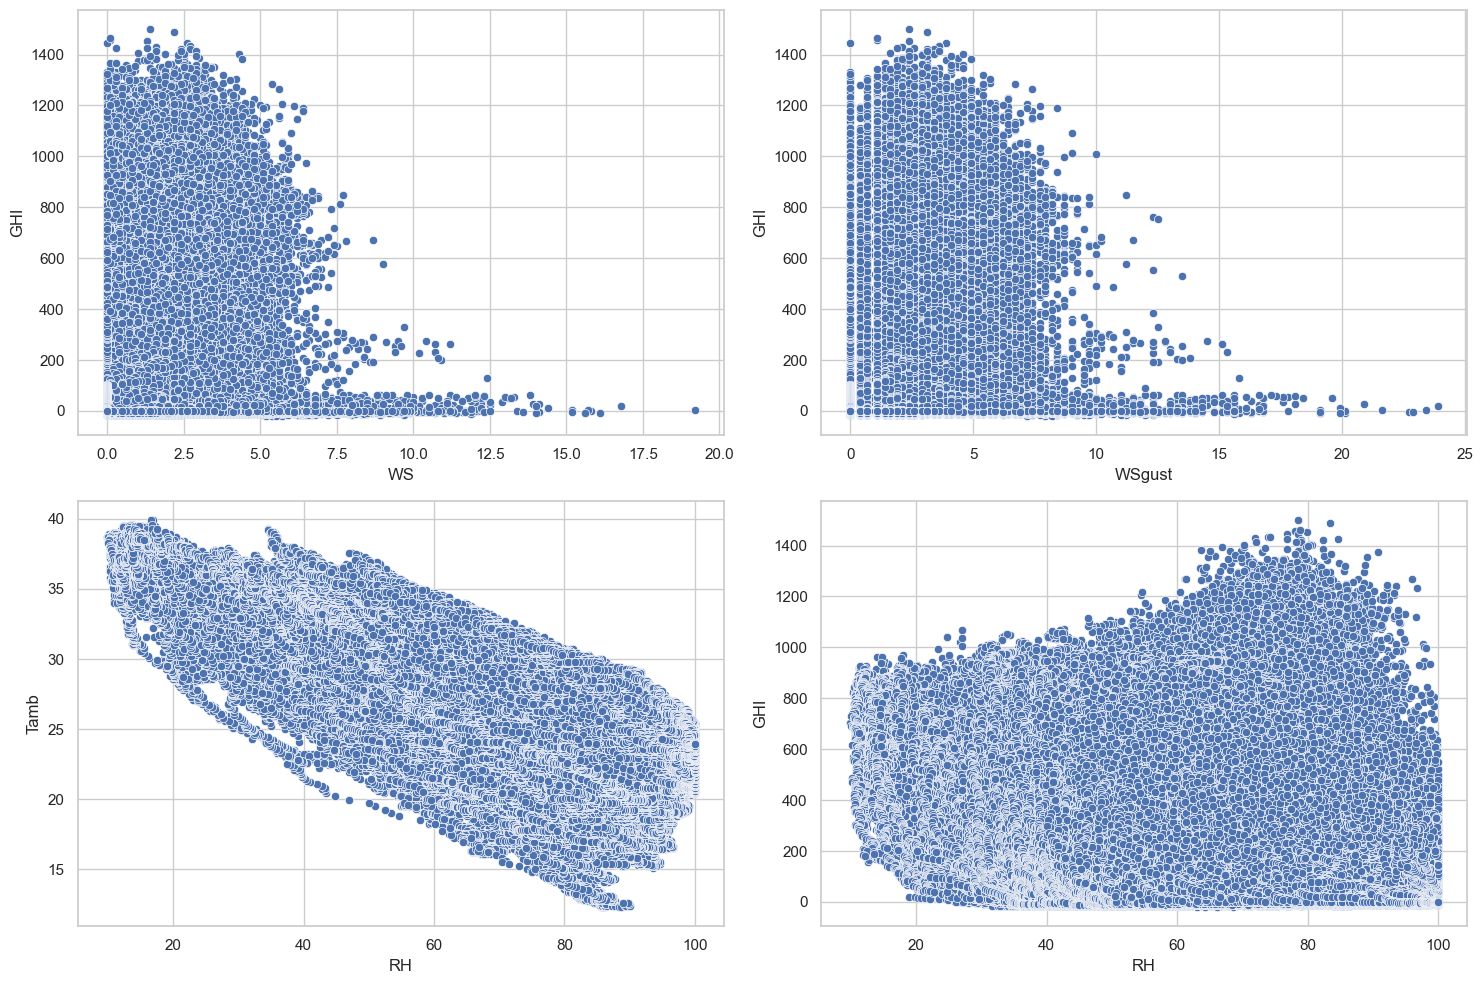

In [9]:
# Correlation heatmap
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
plt.figure(figsize=(10, 8))
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Scatter plots
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='WS', y='GHI')
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='WSgust', y='GHI')
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='RH', y='Tamb')
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='RH', y='GHI')
plt.tight_layout()
plt.show()

7. Wind & Distribution Analysis

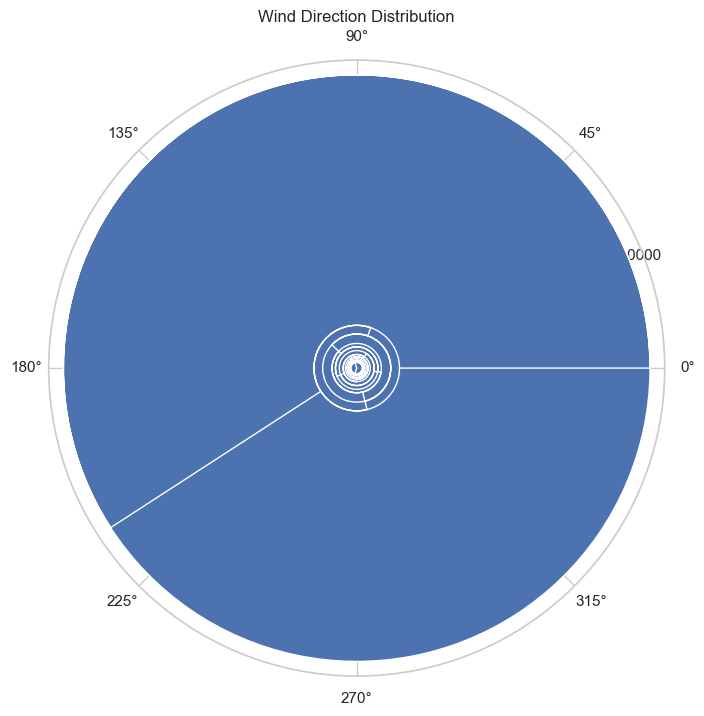

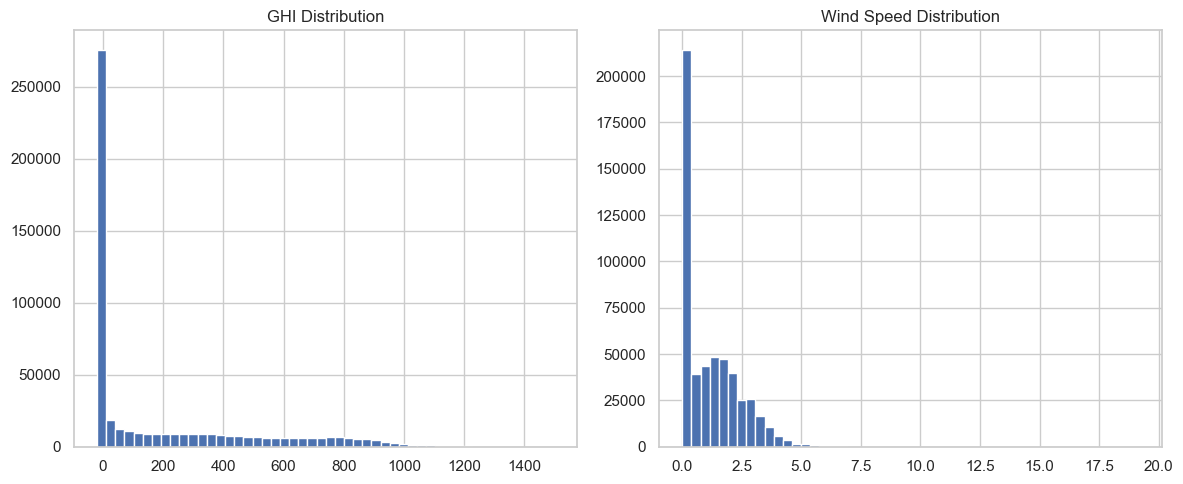

In [10]:
# Wind direction analysis (if WD exists)
if 'WD' in df.columns:
    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, polar=True)
    df['WD'].hist(bins=36, ax=ax)
    plt.title('Wind Direction Distribution')
    plt.show()

# Histograms
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
df['GHI'].hist(bins=50)
plt.title('GHI Distribution')
plt.subplot(1, 2, 2)
df['WS'].hist(bins=50)
plt.title('Wind Speed Distribution')
plt.tight_layout()
plt.show()

8. Temperature Analysis

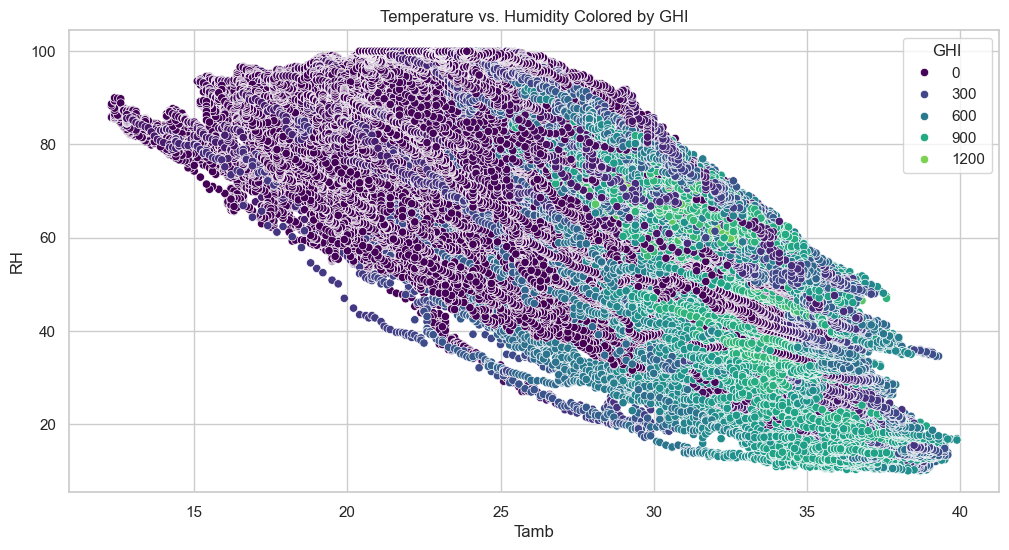

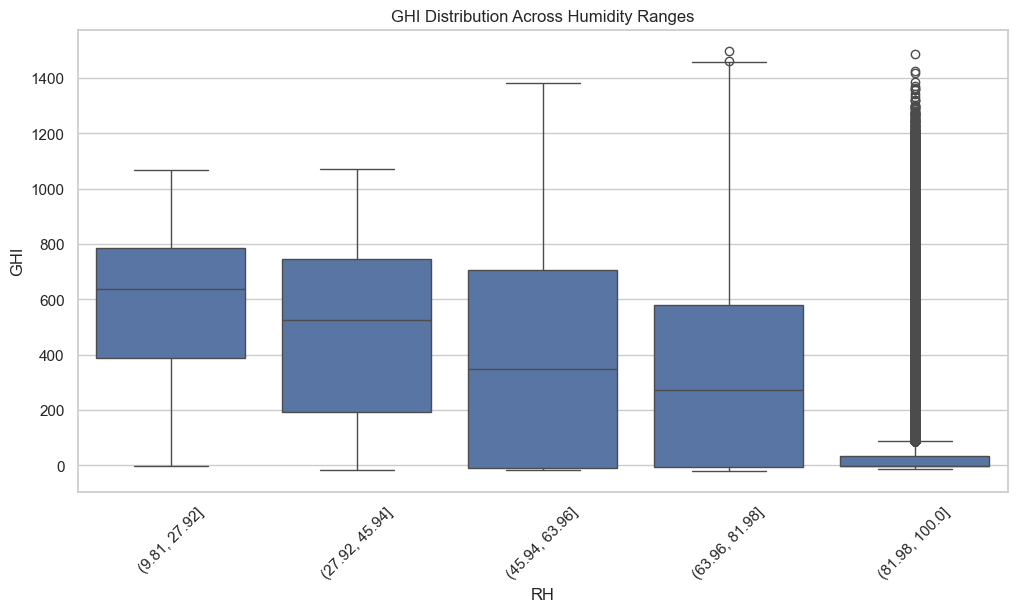

In [11]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Tamb', y='RH', hue='GHI', palette='viridis')
plt.title('Temperature vs. Humidity Colored by GHI')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x=pd.cut(df['RH'], bins=5), y='GHI')
plt.title('GHI Distribution Across Humidity Ranges')
plt.xticks(rotation=45)
plt.show()

Bubble chart 

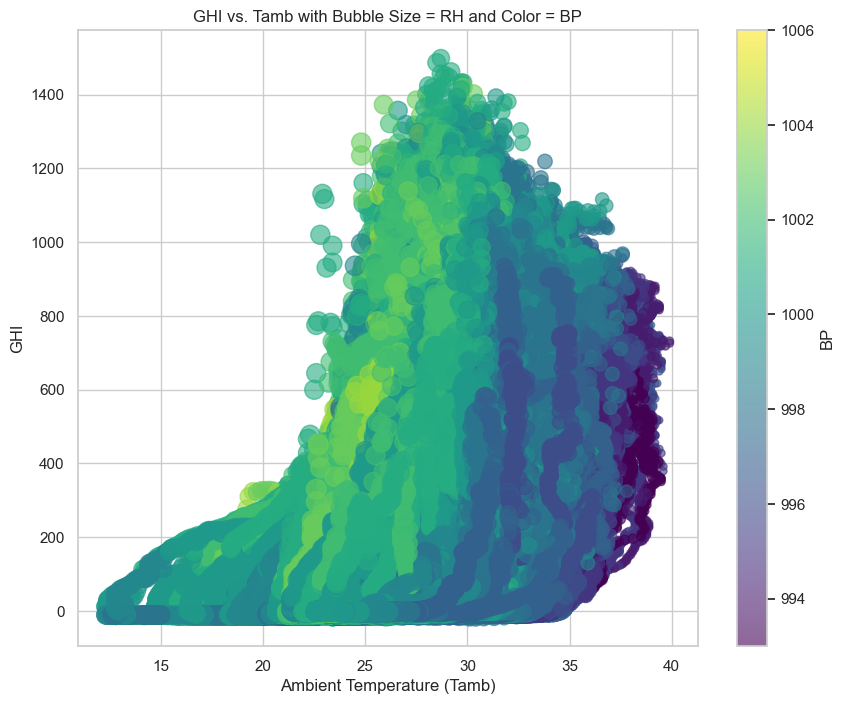

In [12]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    x=df['Tamb'],
    y=df['GHI'],
    s=df['RH']*2,  # Bubble size based on RH
    c=df['BP'],    # Color based on BP
    alpha=0.6,
    cmap='viridis'
)
plt.colorbar(scatter, label='BP')
plt.xlabel('Ambient Temperature (Tamb)')
plt.ylabel('GHI')
plt.title('GHI vs. Tamb with Bubble Size = RH and Color = BP')
plt.show()